In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='ignore')


In [5]:
df.sample(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4108,ham,I want to lick your pussy now...,NaN,NaN,NaN
3387,ham,Same as kallis dismissial in 2nd test:-).,NaN,NaN,NaN
4680,ham,Are you staying in town ?,NaN,NaN,NaN
1751,ham,* Was thinking about chuckin ur red green n bl...,NaN,NaN,NaN
312,ham,He says he'll give me a call when his friend's...,NaN,NaN,NaN
5195,ham,Darren was saying dat if u meeting da ge den w...,NaN,NaN,NaN
4698,ham,Yes fine,NaN,NaN,NaN
1949,ham,Wait 2 min..stand at bus stop,NaN,NaN,NaN
5067,ham,Talk to g and x about that,NaN,NaN,NaN
5099,ham,"Ah, well that confuses things, doesnt it? I th...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
3199,ham,Just curious because my cuz asked what I was u...
4955,ham,Ahhhh...just woken up!had a bad dream about u ...
1380,ham,i dnt wnt to tlk wid u
3132,ham,So no messages. Had food?
5017,ham,Babe ! What are you doing ? Where are you ? Wh...


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2606,ham,R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
510,ham,"8 at the latest, g's still there if you can sc..."
4595,ham,Carlos is down but I have to pick it up from h...
519,ham,Usually the person is unconscious that's in ch...
2928,ham,Where wuld I be without my baby? The thought a...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

404

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5168, 2)

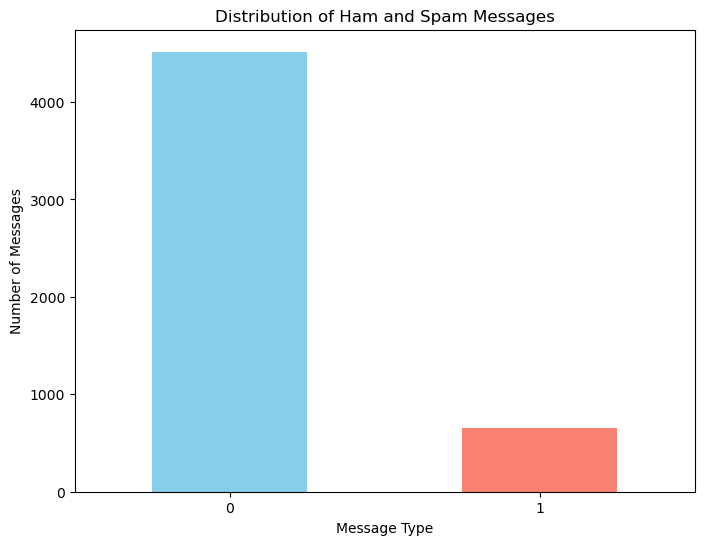

In [19]:
import matplotlib.pyplot as plt

# Get the counts of each category
counts = df['target'].value_counts()

# Create a bar chart
plt.figure(figsize=(8,6))
counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Add titles and labels
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal

# Display the plot
plt.show()


In [20]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HP PROBOOK 430
[nltk_data]     G4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [31]:
import seaborn as sns

c:\Users\HP PROBOOK 430 G4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP PROBOOK 430 G4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

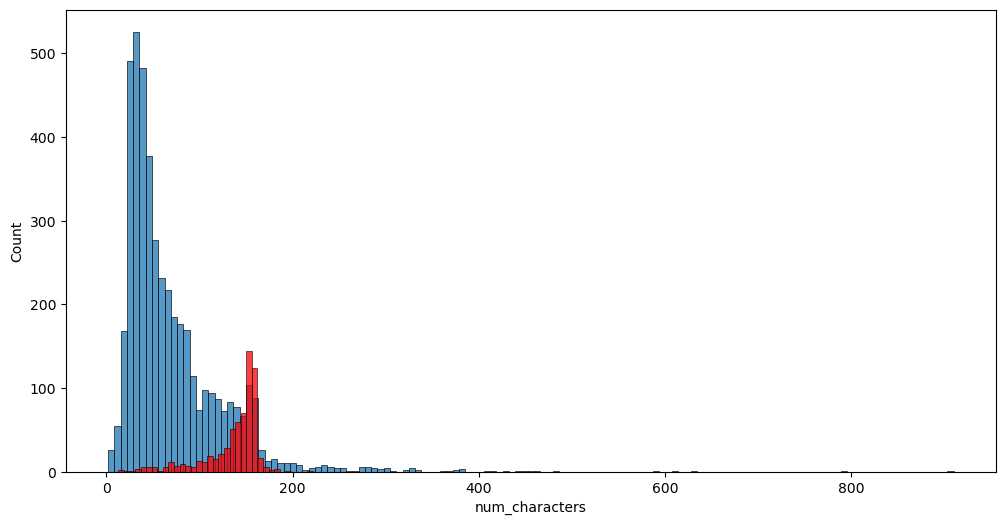

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


c:\Users\HP PROBOOK 430 G4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP PROBOOK 430 G4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

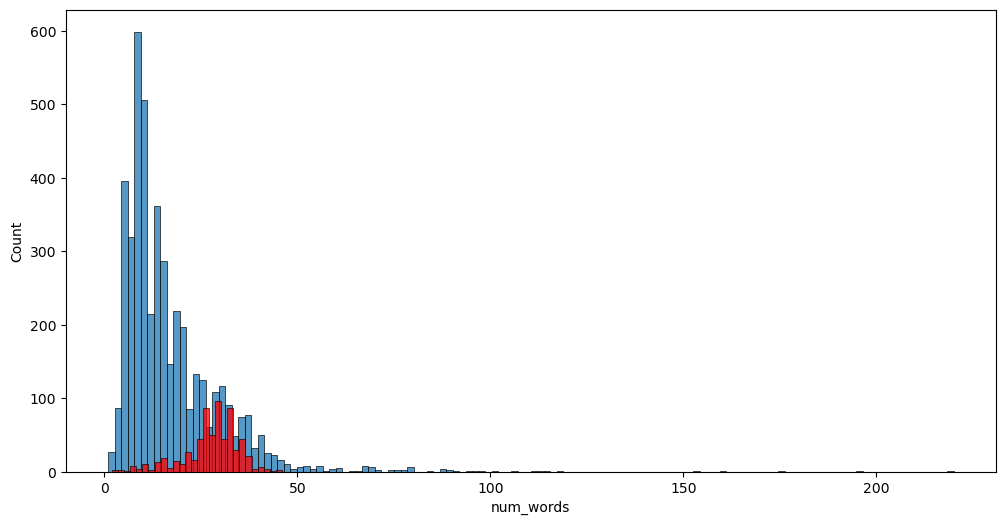

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

c:\Users\HP PROBOOK 430 G4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP PROBOOK 430 G4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP PROBOOK 430 G4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


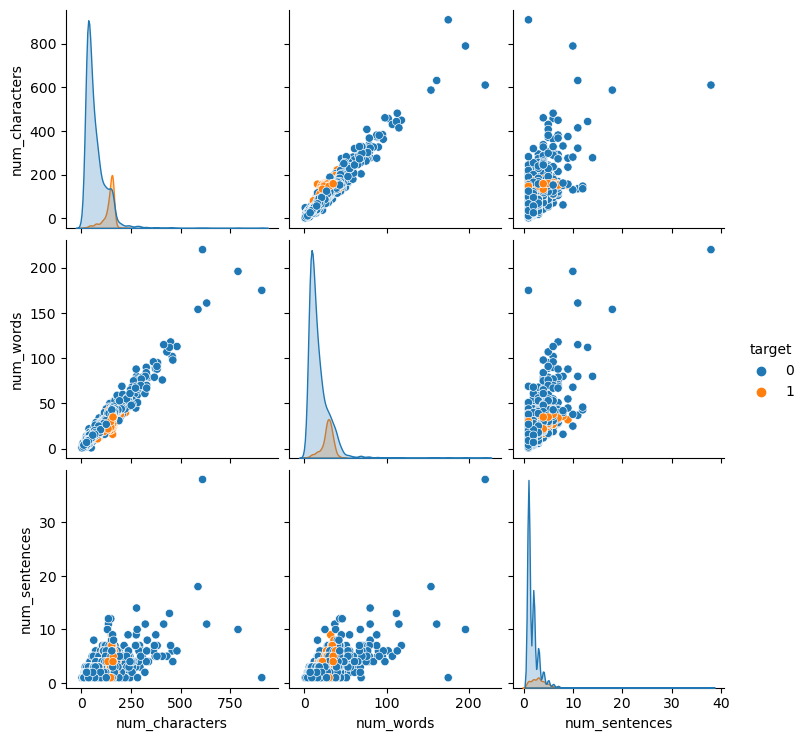

In [33]:
sns.pairplot(df,hue='target')

In [34]:
print(df.dtypes)

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


In [35]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5168 non-null   int32 
 1   text            5168 non-null   object
 2   num_characters  5168 non-null   int64 
 3   num_words       5168 non-null   int64 
 4   num_sentences   5168 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB
None
   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24 

                  target  num_characters  num_words  num_sentences
target          1.000000        0.381208   0.263101       0.265786
num_characters  0.381208        1.000000   0.966336       0.624425
num_words       0.263101        0.966336   1.000000       0.680239
num_sentences   0.265786        0.624425   0.680239       1.000000


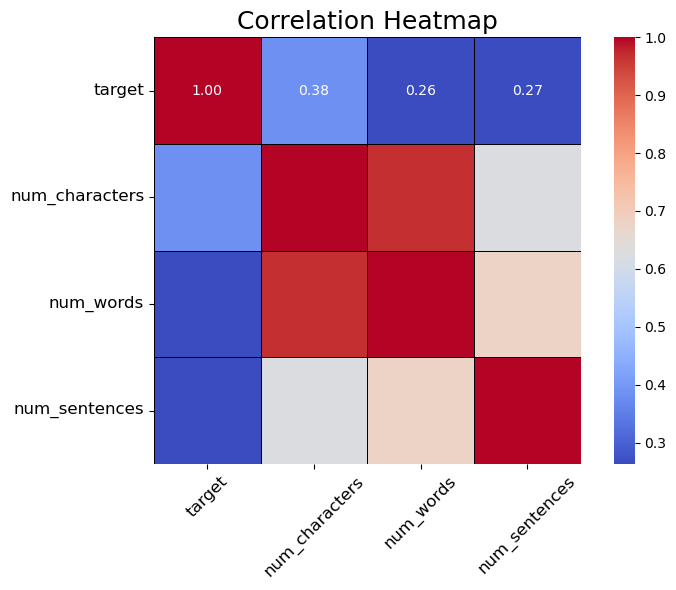

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are used
numeric_df = df[['target', 'num_characters', 'num_words', 'num_sentences']]

# Verify the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)  # Check if the matrix is computed correctly



# Plot the heatmap with improved layout
plt.figure(figsize=(8, 6))  # Increase figure size for better visibility
sns.heatmap(
    numeric_df.corr(),
    annot=True,               # Display correlation coefficients
    fmt=".2f",                # Limit annotation to 2 decimal places
    cmap='coolwarm',          # Use a diverging color map
    cbar=True,                # Add color bar
    square=True,              # Make heatmap cells square
    linewidths=0.5,           # Add lines between cells
    linecolor='black'         # Add black grid lines for clarity
)
plt.title('Correlation Heatmap', fontsize=18)  # Add a title with larger font size
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels and increase font size
plt.yticks(rotation=0, fontsize=12)   # Keep y-axis labels horizontal and increase font size
plt.tight_layout()                    # Adjust layout to fit everything
plt.show()



In [37]:
import nltk
from nltk.corpus import stopwords
import string


In [38]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\HP PROBOOK 430
[nltk_data]     G4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
pip install wordcloud



   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 187.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/299.9 kB 187.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 252.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/299.9 kB 409.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/299.9 kB 655.1 kB/s eta 0:00:01
   -------------------------------------  297.0/299.9 kB 833.5 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 806.9 kB/s eta 0:00:00


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

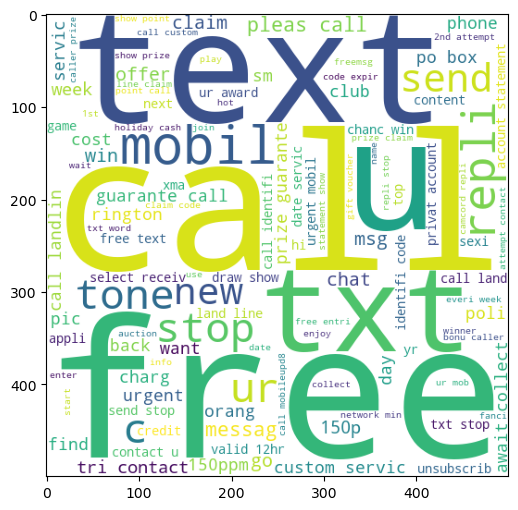

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

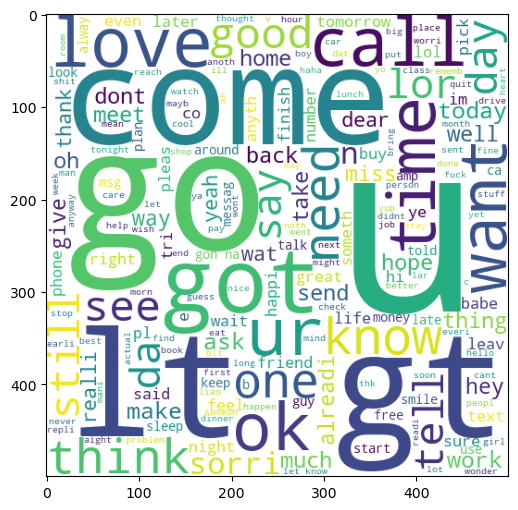

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [54]:
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', '900', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', '

In [55]:
len(spam_corpus)

10106

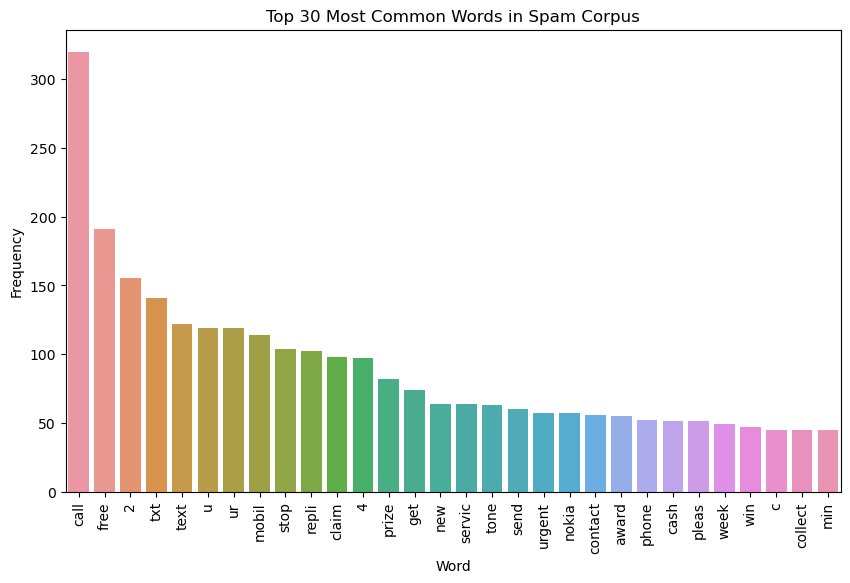

In [56]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the most common words in spam_corpus
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=word_counts)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()


In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35380

In [59]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

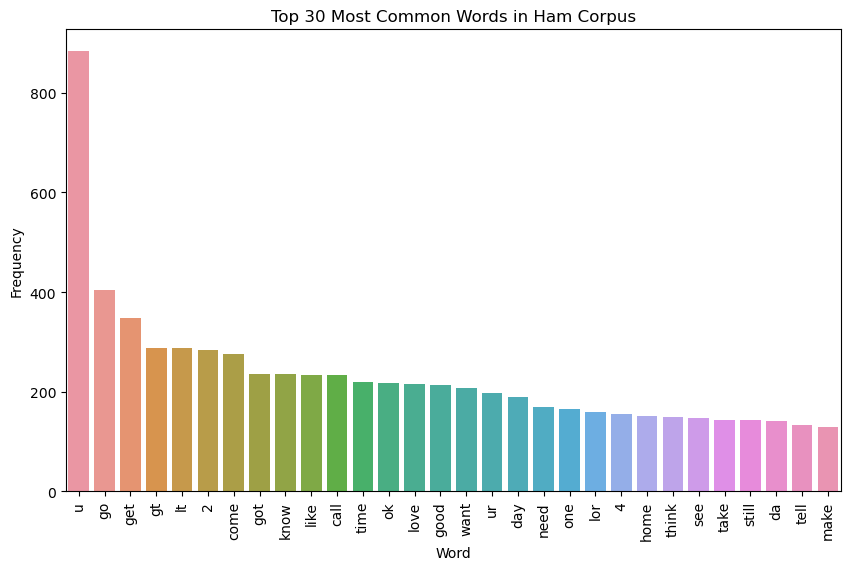

In [60]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the most common words in ham_corpus
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=word_counts)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Corpus")
plt.show()


In [62]:
# Text Vectorization
# using Bag of Words

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
# X = cv.fit_transform(df['transformed_text']).toarray()

In [68]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)


In [69]:
# # appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [65]:
X.shape

(5168, 3000)

In [71]:
X.shape

(5168, 3000)

In [66]:
y = df['target'].values

In [67]:
print(y)

[0 0 1 ... 0 0 0]


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [73]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [74]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [97]:
# tfidf --> MNB

In [459]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [78]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [102]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9834710743801653)

In [103]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9834710743801653
For  KN
Accuracy -  0.9013539651837524
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8645833333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9611650485436893
For  RF
Accuracy -  0.9671179883945842
Precision -  0.9908256880733946
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8787878787878788
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9393939393939394
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9655172413793104


In [704]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [705]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.894584,1.000000
2,NB,0.953578,1.000000
8,ETC,0.974855,1.000000
5,RF,0.970986,0.991150
0,SVC,0.974855,0.983193
4,LR,0.951644,0.950495
10,xgb,0.968085,0.950000
6,AdaBoost,0.964217,0.926230
9,GBDT,0.946809,0.898148
7,BgC,0.958414,0.876923


In [706]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [613]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.902321
1,ETC,Accuracy,0.972921
2,RF,Accuracy,0.966151
3,xgb,Accuracy,0.972921
4,LR,Accuracy,0.968085
5,GBDT,Accuracy,0.943907
6,BgC,Accuracy,0.964217
7,DT,Accuracy,0.920696
8,AdaBoost,Accuracy,0.961315
9,NB,Accuracy,0.963250


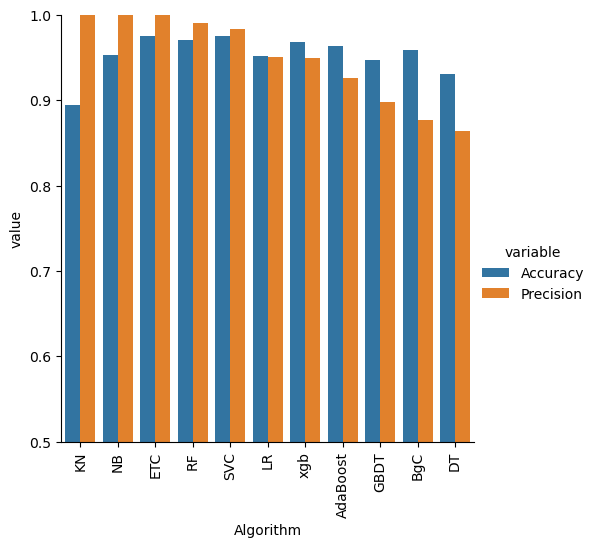

In [707]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [637]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.901354,1.000000
2,NB,0.970019,1.000000
5,RF,0.967118,0.990826
0,SVC,0.976789,0.983471
8,ETC,0.971954,0.974576
10,xgb,0.968085,0.965517
4,LR,0.955513,0.961165
6,AdaBoost,0.960348,0.946429
9,GBDT,0.947776,0.939394
7,BgC,0.960348,0.878788


In [708]:
new_df=performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.894584,1.000000,0.901354,1.000000
1,NB,0.953578,1.000000,0.970019,1.000000
2,ETC,0.974855,1.000000,0.971954,0.974576
3,RF,0.970986,0.991150,0.967118,0.990826
4,SVC,0.974855,0.983193,0.976789,0.983471
5,LR,0.951644,0.950495,0.955513,0.961165
6,xgb,0.968085,0.950000,0.968085,0.965517
7,AdaBoost,0.964217,0.926230,0.960348,0.946429
8,GBDT,0.946809,0.898148,0.947776,0.939394
9,BgC,0.958414,0.876923,0.960348,0.878788


In [659]:
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.902321,1.000000,0.901354,1.000000,0.900387,1.000000
1,ETC,0.972921,0.991304,0.971954,0.974576,0.971954,0.974576
2,RF,0.966151,0.981818,0.967118,0.990826,0.967118,0.990826
3,xgb,0.972921,0.974790,0.968085,0.965517,0.968085,0.965517
4,LR,0.968085,0.973684,0.955513,0.961165,0.965184,0.964602
5,GBDT,0.943907,0.956044,0.947776,0.939394,0.947776,0.939394
6,BgC,0.964217,0.940678,0.960348,0.878788,0.960348,0.878788
7,DT,0.920696,0.940299,0.929400,0.869565,0.928433,0.860215
8,AdaBoost,0.961315,0.939130,0.960348,0.946429,0.960348,0.946429
9,NB,0.963250,0.836601,0.970019,1.000000,0.981625,0.976562


In [709]:
new_df_scaled = new_df.merge(temp_df1,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.894584,1.000000,0.901354,1.000000,0.900387,1.000000
1,NB,0.953578,1.000000,0.970019,1.000000,0.981625,0.976562
2,ETC,0.974855,1.000000,0.971954,0.974576,0.971954,0.974576
3,RF,0.970986,0.991150,0.967118,0.990826,0.967118,0.990826
4,SVC,0.974855,0.983193,0.976789,0.983471,0.971954,0.959016
5,LR,0.951644,0.950495,0.955513,0.961165,0.965184,0.964602
6,xgb,0.968085,0.950000,0.968085,0.965517,0.968085,0.965517
7,AdaBoost,0.964217,0.926230,0.960348,0.946429,0.960348,0.946429
8,GBDT,0.946809,0.898148,0.947776,0.939394,0.947776,0.939394
9,BgC,0.958414,0.876923,0.960348,0.878788,0.960348,0.878788


In [681]:
temp_df3 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df3,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.902321,1.000000,0.901354,1.000000,0.900387,1.000000,0.887814,1.000000
1,ETC,0.972921,0.991304,0.971954,0.974576,0.971954,0.974576,0.972921,0.959350
2,RF,0.966151,0.981818,0.967118,0.990826,0.967118,0.990826,0.971954,0.982759
3,xgb,0.972921,0.974790,0.968085,0.965517,0.968085,0.965517,0.967118,0.957265
4,LR,0.968085,0.973684,0.955513,0.961165,0.965184,0.964602,0.967118,0.965217
5,GBDT,0.943907,0.956044,0.947776,0.939394,0.947776,0.939394,0.949710,0.949495
6,BgC,0.964217,0.940678,0.960348,0.878788,0.960348,0.878788,0.970986,0.930233
7,DT,0.920696,0.940299,0.929400,0.869565,0.928433,0.860215,0.945841,0.897196
8,AdaBoost,0.961315,0.939130,0.960348,0.946429,0.960348,0.946429,0.961315,0.917355
9,NB,0.963250,0.836601,0.970019,1.000000,0.981625,0.976562,0.975822,0.983333


In [710]:
new_df_scaled.merge(temp_df3,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.894584,1.000000,0.901354,1.000000,0.900387,1.000000,0.887814,1.000000
1,NB,0.953578,1.000000,0.970019,1.000000,0.981625,0.976562,0.975822,0.983333
2,ETC,0.974855,1.000000,0.971954,0.974576,0.971954,0.974576,0.972921,0.959350
3,RF,0.970986,0.991150,0.967118,0.990826,0.967118,0.990826,0.971954,0.982759
4,SVC,0.974855,0.983193,0.976789,0.983471,0.971954,0.959016,0.863636,0.000000
5,LR,0.951644,0.950495,0.955513,0.961165,0.965184,0.964602,0.967118,0.965217
6,xgb,0.968085,0.950000,0.968085,0.965517,0.968085,0.965517,0.967118,0.957265
7,AdaBoost,0.964217,0.926230,0.960348,0.946429,0.960348,0.946429,0.961315,0.917355
8,GBDT,0.946809,0.898148,0.947776,0.939394,0.947776,0.939394,0.949710,0.949495
9,BgC,0.958414,0.876923,0.960348,0.878788,0.960348,0.878788,0.970986,0.930233


In [104]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [105]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [730]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [106]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 1.0


In [127]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [128]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [129]:
from sklearn.ensemble import StackingClassifier

In [130]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [131]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9846153846153847


In [80]:
import pickle
mnb.fit(X_train, y_train)
pickle.dump(mnb, open('model.pkl', 'wb'))

In [81]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
